# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?appid=ace7c9b072a24a23e7e9a248a5aded6e&units=metric&q=pisco


In [4]:
city_weather = requests.get(city_url).json()
print(city_weather)

{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.03, 'feels_like': 15.83, 'temp_min': 15.01, 'temp_max': 16.03, 'pressure': 1016, 'humidity': 82, 'sea_level': 1016, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 2.06, 'deg': 260}, 'clouds': {'all': 0}, 'dt': 1723340313, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1723288922, 'sunset': 1723330703}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [12]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | sergeyevka
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | puerto armuelles
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | margaret river
Processing Record 10 of Set 1 | businga
Processing Record 11 of Set 1 | st. john's
Processing Record 12 of Set 1 | hirara
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | san antonio de pale
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | fortaleza
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | soe
Processing Record 20 of Set 1 | fort bragg
Processing Record 21 of Set 1 | uman
Processing Record 22 of Set 1 |

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [8]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,24.43,19,40,7.20,CA,1723340316
1,port macquarie,-31.4333,152.9167,19.48,74,84,3.13,AU,1723340317
2,sergeyevka,53.8800,67.4158,13.20,67,100,1.39,KZ,1723340318
3,arraial do cabo,-22.9661,-42.0278,19.28,66,0,10.03,BR,1723340319
4,puerto armuelles,8.2833,-82.8667,25.61,89,100,2.24,PA,1723340320


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Change column names for clarity, also to help plot titles later
city_data_df.rename(columns={'Lat': 'Latitude', 'Lng': 'Longitude'}, inplace=True)

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,24.43,19,40,7.20,CA,1723340316
1,port macquarie,-31.4333,152.9167,19.48,74,84,3.13,AU,1723340317
2,sergeyevka,53.8800,67.4158,13.20,67,100,1.39,KZ,1723340318
3,arraial do cabo,-22.9661,-42.0278,19.28,66,0,10.03,BR,1723340319
4,puerto armuelles,8.2833,-82.8667,25.61,89,100,2.24,PA,1723340320


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

Index(['City', 'Latitude', 'Longitude', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


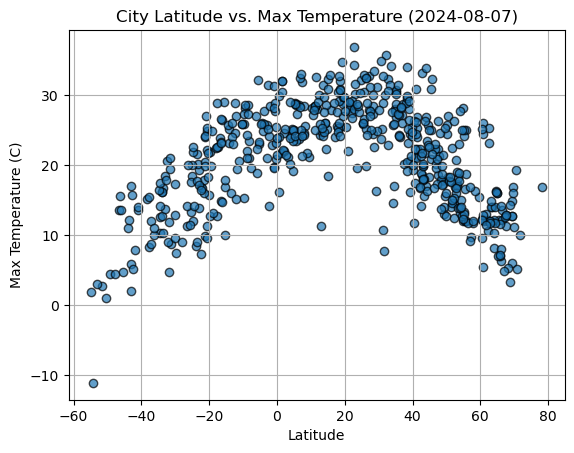

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE


x_values = city_data_df['Latitude']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black', alpha=.7)
print(city_data_df.columns)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2024-08-07)')
plt.grid(True)

plt.savefig("output_data/Fig1.png")



# Show plot
plt.show()

#### Latitude Vs. Humidity

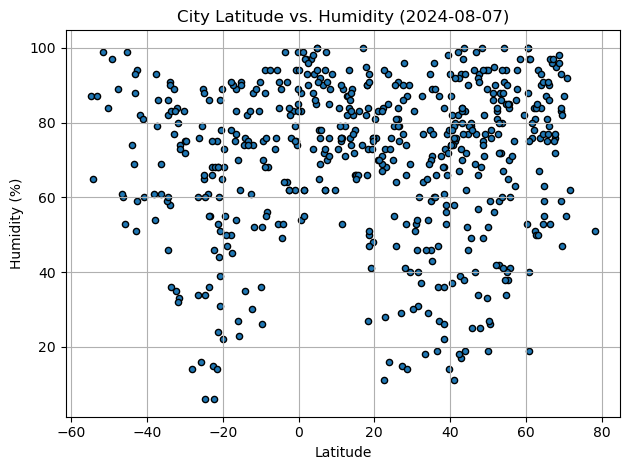

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Latitude', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity (2024-08-07)')


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

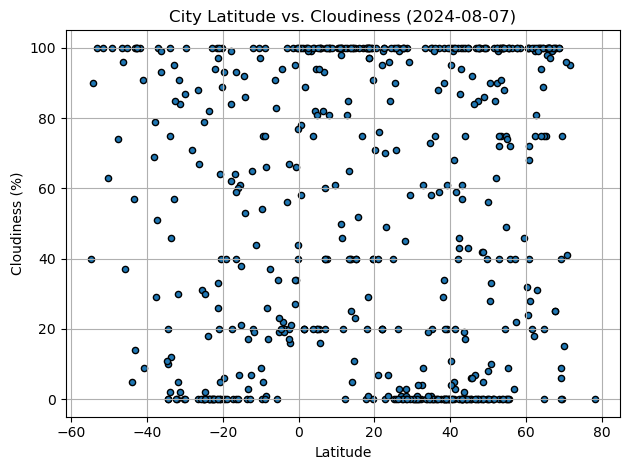

In [20]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot(kind='scatter', x='Latitude', y='Cloudiness', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Cloudiness (2024-08-07)')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

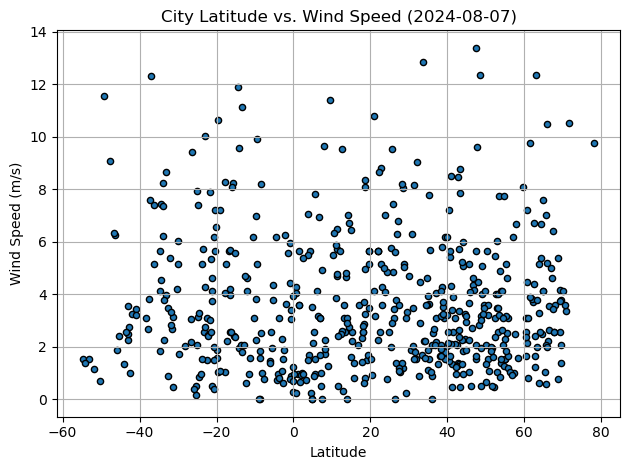

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

city_data_df.plot(kind='scatter', x='Latitude', y='Wind Speed', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Wind Speed (2024-08-07)')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def regress_func(city_data_df, x_col, y_col):
   
    # Use scipy.stats lingress
    (slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df[x_col], city_data_df[y_col])

    # Get linear regression values
    linreg_values = city_data_df[x_col] * slope + intercept
    line_eq = f"y={round(slope,2)}x + {round(intercept,2)}"
    
    # Plotting the results
    # References: stackoverflow (1)
    plt.scatter(city_data_df[x_col], city_data_df[y_col], alpha=.7)
    plt.plot(city_data_df[x_col], linreg_values, color='red')
    plt.annotate(line_eq, xy=(.06,.05), xycoords='axes fraction', fontsize=15, color='red')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{x_col} v. {y_col}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

    # Return the following:
    return slope, intercept, rvalue, pvalue, stderr, linreg_values





In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= city_data_df.loc[city_data_df['Latitude']<= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port macquarie,-31.4333,152.9167,19.48,74,84,3.13,AU,1723340317
3,arraial do cabo,-22.9661,-42.0278,19.28,66,0,10.03,BR,1723340319
5,port-aux-francais,-49.3500,70.2167,4.44,97,100,11.53,TF,1723340322
8,margaret river,-33.9500,115.0667,16.11,58,2,6.23,AU,1723340325
12,bredasdorp,-34.5322,20.0403,10.29,86,20,4.53,ZA,1723340329


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= city_data_df[city_data_df['Latitude'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port macquarie,-31.4333,152.9167,19.48,74,84,3.13,AU,1723340317
3,arraial do cabo,-22.9661,-42.0278,19.28,66,0,10.03,BR,1723340319
5,port-aux-francais,-49.3500,70.2167,4.44,97,100,11.53,TF,1723340322
8,margaret river,-33.9500,115.0667,16.11,58,2,6.23,AU,1723340325
12,bredasdorp,-34.5322,20.0403,10.29,86,20,4.53,ZA,1723340329


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.5908161091023958


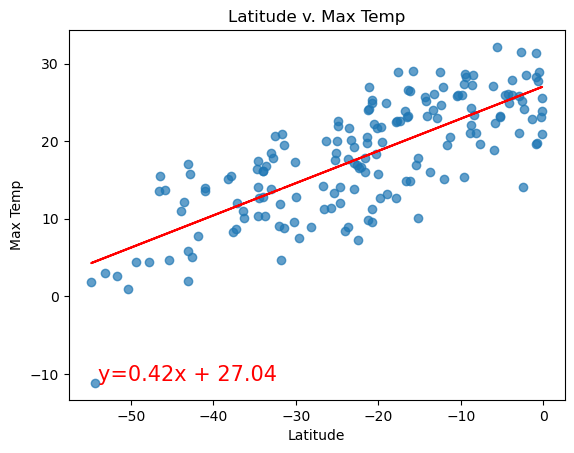

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
temp_north = regress_func(northern_hemi_df, 'Latitude', 'Max Temp')



The r^2-value is: 0.5908161091023958


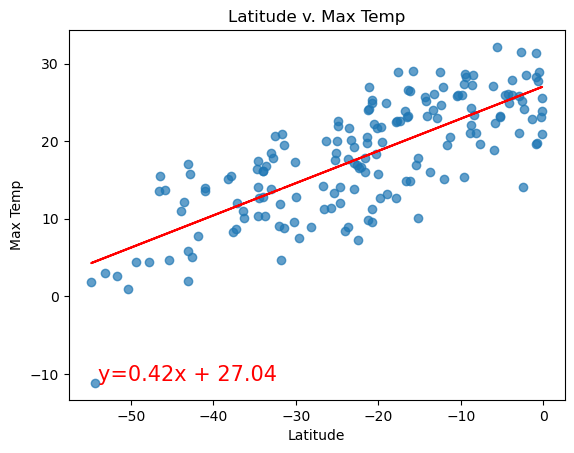

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
temp_south = regress_func(southern_hemi_df, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 6.420525279599055e-05


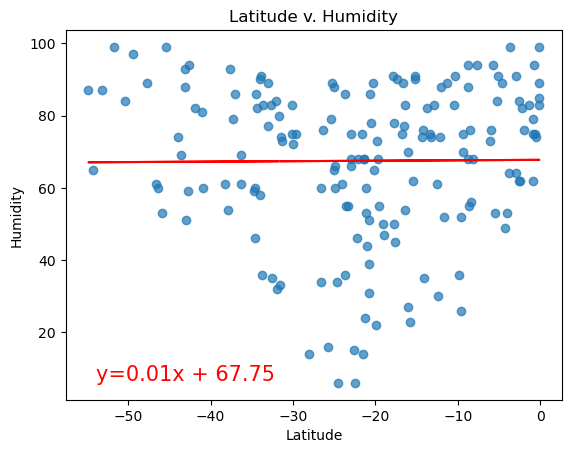

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
humid_north= regress_func(northern_hemi_df, 'Latitude', 'Humidity')


The r^2-value is: 6.420525279599055e-05


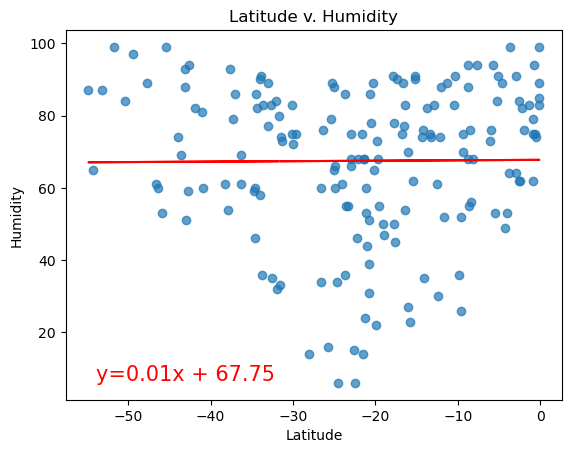

In [28]:
# Southern Hemisphere
# YOUR CODE HERE

humid_south = regress_func(southern_hemi_df, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.025164047865684862


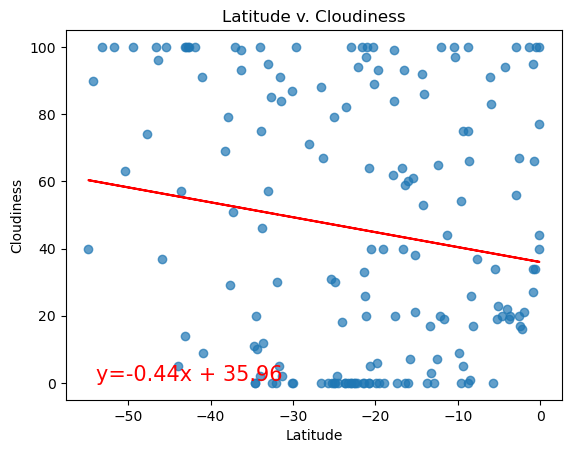

In [29]:
# Northern Hemisphere
# YOUR CODE HERE
cloud_north = regress_func(northern_hemi_df, 'Latitude', 'Cloudiness')

The r^2-value is: 0.025164047865684862


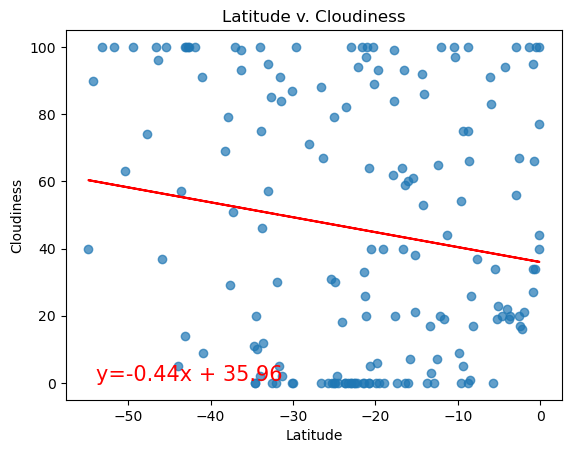

In [30]:
# Southern Hemisphere
# YOUR CODE HERE

could_south = regress_func(southern_hemi_df, 'Latitude', 'Cloudiness')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01264460288105342


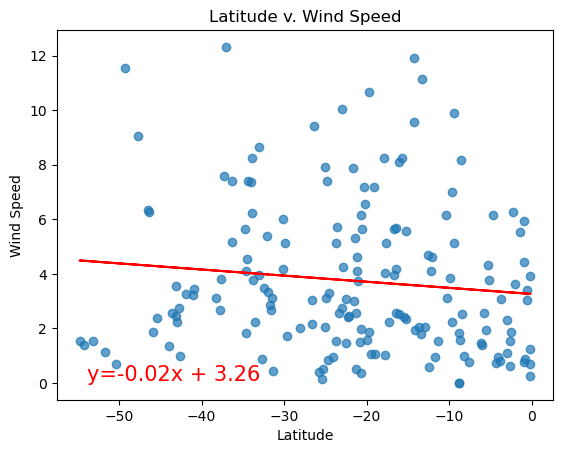

In [31]:
# Northern Hemisphere
# YOUR CODE HERE
wind_north = regress_func(northern_hemi_df, 'Latitude', 'Wind Speed')


The r^2-value is: 0.01264460288105342


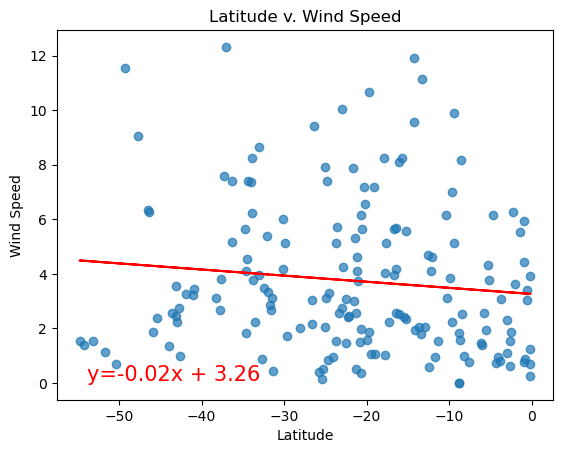

In [32]:
# Southern Hemisphere
# YOUR CODE HERE
wind_south = regress_func(southern_hemi_df, 'Latitude', 'Wind Speed')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# There is no significant relationship between latitude and wind speed based on the available data. The r-value is low for both hemispheres, and the scatter plot shows that the data is too dispersed to indicate any reliable correlation between latitude and wind speed.